In [1]:
from iertools.read import read_epw
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calplot


In [2]:
# plt.style.use('matplotlib.mplstyle')


In [3]:
f = 'data/Temixco_2018CST.epw'
df = read_epw(f,alias=True)

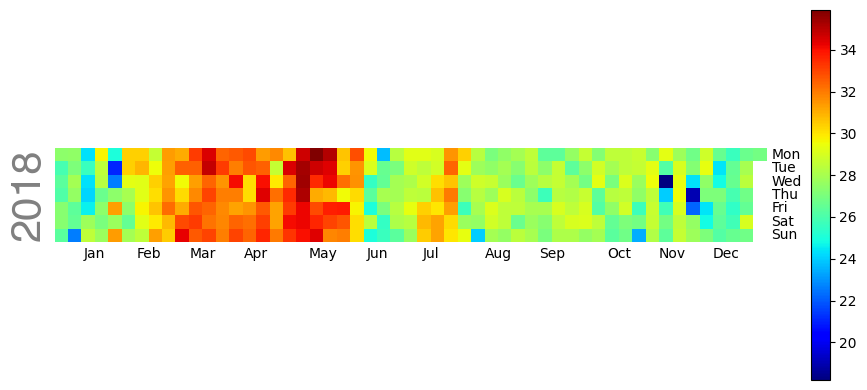

In [5]:
#| label: fig-to-calplot
#| fig-cap: Temperaturas máximas diarias en Temixco, Morelos.
calplot.calplot(df.To.resample('D').max(),
                linewidth=0,
                figsize=(10,4),cmap='jet',colorbar=None);